In [2]:
import sqlite3
db = sqlite3.connect('./database2')
cursor = db.cursor()

In [24]:
import time
cursor.execute('''CREATE TABLE IF NOT EXISTS supp_table(id1 TEXT, chr1 TEXT, start1 INTEGER, end1 INTEGER, strand1 TEXT, \
                id2 TEXT, chr2 TEXT, start2 INTEGER, end2 INTEGER, strand2 TEXT, \
                transcript_id1 TEXT, transcript_id2, \
                dS REAL, dN REAL, \
                exp_pattern TEXT, dup_age TEXT)''')
with open('Downloads/LanAndPritchard2016Dups.txt','r') as file:
    for i in range(0,29):
        file.readline()
    count, t = 0, time.time()
    for line in file:
        line = line.strip().split('\t')
        id1, chr1, s1, e1, str1, id2, chr2, s2, e2, str2, t1, t2, ds, dn, exp, age = line
        placeholder = ','.join(['?' for x in line])
        sql_command = '''INSERT INTO supp_table(id1, chr1, start1, end1, strand1, \
                                                id2, chr2, start2, end2, strand2, \
                                                transcript_id1, transcript_id2, \
                                                dS, dN, \
                                                exp_pattern, dup_age) VALUES(''' + placeholder + ')'
        cursor.execute(sql_command, (id1, chr1, s1, e1, str1, id2, chr2, s2, e2, str2, t1, t2, ds, dn, exp, age))
        count += 1
        if count % 100 == 0:
            print(count, round(time.time()-t, 2))
db.commit()

100 0.01
200 0.02
300 0.02
400 0.02
500 0.02
600 0.03
700 0.03
800 0.03
900 0.04
1000 0.04
1100 0.04
1200 0.05
1300 0.05
1400 0.05


In [33]:
# other_cursor.execute('''ALTER TABLE t_ohnologs ADD COLUMN vertebrate TEXT''')
other_cursor.execute('''SELECT id, ohno_id FROM t_ohnologs''')
count, t = 0, time.time()
not_para_count = 0
for x in other_cursor.fetchall():
    id1, id2 = x
    other_cursor.execute('''SELECT vertebrate FROM paralogs WHERE ((id == ? AND para == ?) OR (id == ? AND para == ?))''', (id1, id2, id2, id1))
    try:
        status = other_cursor.fetchall()[0][0]
        other_cursor.execute('''UPDATE t_ohnologs SET vertebrate == ?''', (status,))
    except IndexError:
        not_para_count += 1
    count += 1
    if count % 500 == 0:
        print(count, round(time.time()-t, 2))
orig_db.commit()

500 52.18
1000 108.42
1500 162.86
2000 217.14
2500 269.38
3000 323.72
3500 371.37
4000 421.93
4500 470.38
5000 520.99
5500 562.71
6000 605.17
6500 658.83
7000 702.28
7500 750.23
8000 793.14
8500 816.15
9000 839.17
9500 891.08
10000 945.31
10500 998.49
11000 1052.86
11500 1106.15
12000 1160.31
12500 1208.69
13000 1256.17
13500 1304.3
14000 1353.62
14500 1396.05
15000 1439.49
15500 1490.74
16000 1535.42
16500 1588.97
17000 1630.55
17500 1656.68
18000 1679.67
18500 1729.85
19000 1786.11
19500 1840.09
20000 1895.18
20500 1948.74
21000 2001.97
21500 2049.86
22000 2097.06
22500 2145.77
23000 2194.4
23500 2239.41
24000 2280.05
24500 2330.01
25000 2375.43
25500 2429.59
26000 2469.63
26500 2498.26
27000 2519.55
27500 2569.35
28000 2621.52
28500 2677.45
29000 2737.78
29500 2792.93
30000 2847.27
30500 2897.39
31000 2949.61
31500 2995.07
32000 3045.09
32500 3090.08
33000 3134.08
33500 3181.82
34000 3227.06
34500 3281.29
35000 3321.1
35500 3353.18
36000 3374.48


In [26]:
orig_db = sqlite3.connect('./database')
other_cursor = orig_db.cursor()

In [35]:
cursor.execute('''CREATE TABLE IF NOT EXISTS y_ohnologs(id1 TEXT, id2, TEXT)''')
cursor.execute('''CREATE TABLE IF NOT EXISTS t_ohnologs(id1 TEXT, id2 TEXT)''')
cursor.execute('''CREATE TABLE IF NOT EXISTS s_ohnologs(id1 TEXT, id2 TEXT)''')

other_cursor.execute('''SELECT id, ohno_id FROM ohnologs_gene_ids WHERE vertebrate = "Yes"''')
ohno_y = other_cursor.fetchall()

other_cursor.execute('''SELECT id, ohno_id FROM t_ohnologs''')
ohno_t = other_cursor.fetchall()

for o in ohno_y:
    cursor.execute('''INSERT INTO y_ohnologs(id1, id2) VALUES(?,?)''', o)
for o in ohno_t:
    cursor.execute('''INSERT INTO t_ohnologs(id1, id2) VALUES(?,?)''', o)
with open('Downloads/HUMAN.Pairs.Intermediate.2R.txt','r') as file:
    file.readline()
    for line in file:
        line = line.strip().split('/t')
        id1, id2 = line[0], line[1]
        cursor.execute('''INSERT INTO s_ohnologs(id1, id2) VALUES(?,?)''', (id1, id2))
db.commit()

IndexError: list index out of range

In [34]:
not_para_count

11464

In [36]:
db.commit()

In [38]:
with open('Downloads/HUMAN.Pairs.Intermediate.2R.txt','r') as file:
    file.readline()
    for line in file:
        line = line.strip().split('\t')
        try:
            id1, id2 = line[0], line[1]
            cursor.execute('''INSERT INTO s_ohnologs(id1, id2) VALUES(?,?)''', (id1, id2))
        except IndexError:
            print(line)
db.commit()

In [97]:
cursor.execute('''CREATE TABLE IF NOT EXISTS ohnologs_strict(id1 TEXT, chr1 TEXT, start1 INTEGER, end1 INTEGER, strand1 TEXT, \
                id2 TEXT, chr2 TEXT, start2 INTEGER, end2 INTEGER, strand2 TEXT, \
                transcript_id1 TEXT, transcript_id2, \
                dS REAL, dN REAL, \
                exp_pattern TEXT, dup_age TEXT)''')
cursor.execute('''CREATE TABLE IF NOT EXISTS ohnologs_any(id1 TEXT, chr1 TEXT, start1 INTEGER, end1 INTEGER, strand1 TEXT, \
                id2 TEXT, chr2 TEXT, start2 INTEGER, end2 INTEGER, strand2 TEXT, \
                transcript_id1 TEXT, transcript_id2, \
                dS REAL, dN REAL, \
                exp_pattern TEXT, dup_age TEXT)''')
cursor.execute('''CREATE TABLE IF NOT EXISTS without_ohnologs_strict(id1 TEXT, chr1 TEXT, start1 INTEGER, end1 INTEGER, strand1 TEXT, \
                id2 TEXT, chr2 TEXT, start2 INTEGER, end2 INTEGER, strand2 TEXT, \
                transcript_id1 TEXT, transcript_id2, \
                dS REAL, dN REAL, \
                exp_pattern TEXT, dup_age TEXT)''')
cursor.execute('''CREATE TABLE IF NOT EXISTS without_ohnologs_any(id1 TEXT, chr1 TEXT, start1 INTEGER, end1 INTEGER, strand1 TEXT, \
                id2 TEXT, chr2 TEXT, start2 INTEGER, end2 INTEGER, strand2 TEXT, \
                transcript_id1 TEXT, transcript_id2, \
                dS REAL, dN REAL, \
                exp_pattern TEXT, dup_age TEXT)''')

cursor.execute('''SELECT * FROM supp_table''')
total = cursor.fetchall()
count_1, count_2 = 0, 0
for line in total:
    placeholder = ','.join(['?' for x in line])
    y, t, s = 0,0,0
    gene1, gene2 = line[0], line[5]
    #all lines included up to here
    
    cursor.execute('''SELECT id1,id2 FROM y_ohnologs''')
    y_test = cursor.fetchall()
    if ((gene1, gene2) in y_test) or ((gene2, gene1) in y_test):
        y = 1
    
    cursor.execute('''SELECT * FROM t_ohnologs''')
    t_test = cursor.fetchall()
    if ((gene1, gene2) in t_test) or ((gene2, gene1) in t_test):
        t = 1
        
    cursor.execute('''SELECT * FROM s_ohnologs''')
    s_test = cursor.fetchall()
    if ((gene1, gene2) in s_test) or ((gene2, gene1) in s_test):
        s = 1
        
    if y == 1 and t == 1 and s == 1: #strict ohnolog
        sql_command = '''INSERT INTO ohnologs_strict(id1, chr1, start1, end1, strand1, id2, chr2, start2, end2, strand2, transcript_id1, transcript_id2, dS, dN, exp_pattern, dup_age) VALUES(''' + placeholder + ')'
        cursor.execute(sql_command, line)
        
    else:
        sql_command = '''INSERT INTO without_ohnologs_strict(id1, chr1, start1, end1, strand1, id2, chr2, start2, end2, strand2, transcript_id1, transcript_id2, dS, dN, exp_pattern, dup_age) VALUES(''' + placeholder + ')'
        cursor.execute(sql_command, line)
        
    if y == 1 or t == 1 or s == 1: #any ohnolog
        sql_command = '''INSERT INTO ohnologs_any(id1, chr1, start1, end1, strand1, id2, chr2, start2, end2, strand2, transcript_id1, transcript_id2, dS, dN, exp_pattern, dup_age) VALUES(''' + placeholder + ')'
        cursor.execute(sql_command, line)
        
    else:
        sql_command = '''INSERT INTO without_ohnologs_any(id1, chr1, start1, end1, strand1, id2, chr2, start2, end2, strand2, transcript_id1, transcript_id2, dS, dN, exp_pattern, dup_age) VALUES(''' + placeholder + ')'
        cursor.execute(sql_command, line)
        
db.commit()


In [98]:
cursor.execute('''SELECT COUNT (*) FROM ohnologs_strict''')
print('Strict ohnologs:', cursor.fetchall()[0][0])

cursor.execute('''SELECT COUNT (*) FROM without_ohnologs_strict''')
print('Without strict ohnologs:', cursor.fetchall()[0][0])

cursor.execute('''SELECT COUNT (*) FROM ohnologs_any''')
print('Any definition ohnologs:', cursor.fetchall()[0][0])

cursor.execute('''SELECT COUNT (*) FROM without_ohnologs_any''')
print('Without any ohnologs:', cursor.fetchall()[0][0])

Strict ohnologs: 275
Without strict ohnologs: 1169
Any definition ohnologs: 647
Without any ohnologs: 797


In [96]:
cursor.execute('''DROP TABLE ohnologs_strict''')
cursor.execute('''DROP TABLE without_ohnologs_strict''')
cursor.execute('''DROP TABLE ohnologs_any''')
cursor.execute('''DROP TABLE without_ohnologs_any''')

In [92]:
print(count_1, count_2)

1444 1444


In [623]:
import matplotlib.pyplot as plt, numpy as np


fig, axes = plt.subplots(2, 2, figsize= (12,12))
ax1, ax2 = axes[0]
ax3, ax4 = axes[1]

cursor.execute('SELECT exp_pattern, dS FROM without_ohnologs_strict')
res = cursor.fetchall()
ds_dict = {}
for pattern in set([x[0] for x in res if x[0] != 'noExp']):
    for y in res:
        if y[0] == pattern:
            try:
                ds_dict[pattern].append(y[1])
            except KeyError:
                ds_dict[pattern] = [y[1]]
ax1.set_title('Without ohnologs (by all definitions)')
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
bins = np.arange(0, 2, 0.1)
data = [ds_dict['subNeo'], ds_dict['AED'], ds_dict['noDiff'], ds_dict['unmappable']]
labels = ['Sub-/neofunctionaslized', 'Asymmetrically expressed', 'No difference', 'Unmappable']
colours = [(0.5,0.8,0.2,1),(0.2,0.4,0.7,1),(0,0,0,0.65),(0,0,0,0.3)]
h = ax1.hist(data, label = labels, histtype='barstacked', bins=bins, color=colours, rwidth=0.8, align='mid')

for x in h[2]:
    for y in x.patches:
        y.set_ec((0,0,0,0.6))
        if y.get_y() == 0 and y.get_height() != 0:
            b = y.get_bbox()
            ax1.plot([b.x0+0.0015,b.x1],[0,0], color = 'k')
ax1.set_xticks(np.arange(0,2.001,0.1))
ax1.set_yticks(np.arange(0,301,50))
ticks = [tick for tick in ax1.get_xticks() if tick == 0 or tick == 0.5 or tick == 1.0 or tick == 1.5 or tick == 2.0]
ax1.set_xticks(ticks)
ax1.xaxis.set_tick_params(length=0)
ax1.set_xlabel('dS', style='italic', size=14)
ax1.set_ylabel('Number of pairs', size = 14)

ax1.legend(edgecolor=(1,1,1,1))


In [624]:
cursor.execute('SELECT exp_pattern, dS FROM ohnologs_strict')
res = cursor.fetchall()
ds_dict = {}
for pattern in set([x[0] for x in res if x[0] != 'noExp']):
    for y in res:
        if y[0] == pattern:
            try:
                ds_dict[pattern].append(y[1])
            except KeyError:
                ds_dict[pattern] = [y[1]]
ax2.set_title('Only ohnologs (by all definitions)')
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
bins = np.arange(0, 2, 0.1)
data = [ds_dict['subNeo'], ds_dict['AED'], ds_dict['noDiff'], ds_dict['unmappable']]
labels = ['Sub-/neofunctionaslized', 'Asymmetrically expressed', 'No difference', 'Unmappable']
colours = [(0.5,0.8,0.2,1),(0.2,0.4,0.7,1),(0,0,0,0.65),(0,0,0,0.3)]
h = ax2.hist(data, label = labels, histtype='barstacked', bins=bins, color=colours, rwidth=0.8, align='mid')

for x in h[2]:
    for y in x.patches:
        y.set_ec((0,0,0,0.6))
        if y.get_y() == 0 and y.get_height() != 0:
            b = y.get_bbox()
            ax2.plot([b.x0+0.0015,b.x1],[0,0], color = 'k')
ax2.set_xticks(np.arange(0,2.001,0.1))
ax2.set_yticks(np.arange(0,301,50))
ticks = [tick for tick in ax2.get_xticks() if tick == 0 or tick == 0.5 or tick == 1.0 or tick == 1.5 or tick == 2.0]
ax2.set_xticks(ticks)
ax2.xaxis.set_tick_params(length=0)
ax2.set_xlabel('dS', style='italic', size=14)
ax2.set_ylabel('Number of pairs', size = 14)

ax2.legend(edgecolor=(1,1,1,1))



In [625]:
cursor.execute('SELECT exp_pattern, dS FROM without_ohnologs_any')
res = cursor.fetchall()
ds_dict = {}
for pattern in set([x[0] for x in res if x[0] != 'noExp']):
    for y in res:
        if y[0] == pattern:
            try:
                ds_dict[pattern].append(y[1])
            except KeyError:
                ds_dict[pattern] = [y[1]]
ax3.set_title('Without ohnologs (by at least one definition)')
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['right'].set_visible(False)
bins = np.arange(0, 2, 0.1)
data = [ds_dict['subNeo'], ds_dict['AED'], ds_dict['noDiff'], ds_dict['unmappable']]
labels = ['Sub-/neofunctionaslized', 'Asymmetrically expressed', 'No difference', 'Unmappable']
colours = [(0.5,0.8,0.2,1),(0.2,0.4,0.7,1),(0,0,0,0.65),(0,0,0,0.3)]
h = ax3.hist(data, label = labels, histtype='barstacked', bins=bins, color=colours, rwidth=0.8, align='mid')

for x in h[2]:
    for y in x.patches:
        y.set_ec((0,0,0,0.6))
        if y.get_y() == 0 and y.get_height() != 0:
            b = y.get_bbox()
            ax3.plot([b.x0+0.0015,b.x1],[0,0], color = 'k')
ax3.set_xticks(np.arange(0,2.001,0.1))
ax3.set_yticks(np.arange(0,301,50))
ticks = [tick for tick in ax3.get_xticks() if tick == 0 or tick == 0.5 or tick == 1.0 or tick == 1.5 or tick == 2.0]
ax3.set_xticks(ticks)
ax3.xaxis.set_tick_params(length=0)
ax3.set_xlabel('dS', style='italic', size=14)
ax3.set_ylabel('Number of pairs', size = 14)

ax3.legend(edgecolor=(1,1,1,1))



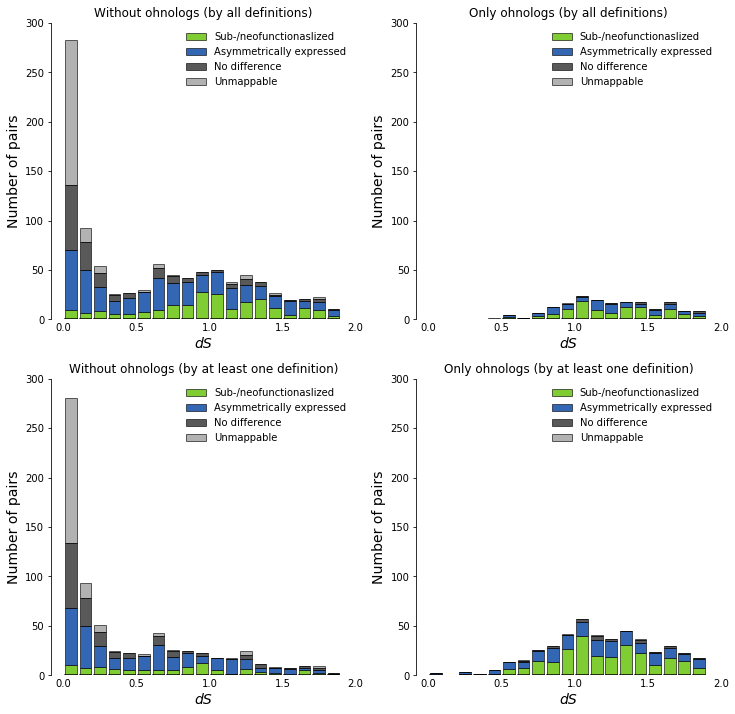

In [626]:
cursor.execute('SELECT exp_pattern, dS FROM ohnologs_any')
res = cursor.fetchall()
ds_dict = {}
for pattern in set([x[0] for x in res if x[0] != 'noExp']):
    for y in res:
        if y[0] == pattern:
            try:
                ds_dict[pattern].append(y[1])
            except KeyError:
                ds_dict[pattern] = [y[1]]
ax4.set_title('Only ohnologs (by at least one definition)')
ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['right'].set_visible(False)
bins = np.arange(0, 2, 0.1)
data = [ds_dict['subNeo'], ds_dict['AED'], ds_dict['noDiff'], ds_dict['unmappable']]
labels = ['Sub-/neofunctionaslized', 'Asymmetrically expressed', 'No difference', 'Unmappable']
colours = [(0.5,0.8,0.2,1),(0.2,0.4,0.7,1),(0,0,0,0.65),(0,0,0,0.3)]
h = ax4.hist(data, label = labels, histtype='barstacked', bins=bins, color=colours, rwidth=0.8, align='mid')

for x in h[2]:
    for y in x.patches:
        y.set_ec((0,0,0,0.6))
        if y.get_y() == 0 and y.get_height() != 0:
            b = y.get_bbox()
            ax4.plot([b.x0+0.0015,b.x1],[0,0], color = 'k')
ax4.set_xticks(np.arange(0,2.001,0.1))
ax4.set_yticks(np.arange(0,301,50))
ticks = [tick for tick in ax4.get_xticks() if tick == 0 or tick == 0.5 or tick == 1.0 or tick == 1.5 or tick == 2.0]
ax4.set_xticks(ticks)
ax4.xaxis.set_tick_params(length=0)
ax4.set_xlabel('dS', style='italic', size=14)
ax4.set_ylabel('Number of pairs', size = 14)

ax4.legend(edgecolor=(1,1,1,1))

plt.savefig('exp_pattern_fig.png', bbox_inches='tight')
plt.show()

In [319]:
cursor.execute('SELECT COUNT (*) FROM ohnologs_any where dup_age == "unclassified"')
cursor.fetchall()

[(412,)]

In [320]:
cursor.execute('SELECT COUNT (*) FROM ohnologs_strict where dup_age == "unclassified"')
cursor.fetchall()

[(176,)]

In [323]:
cursor.execute('''SELECT transcript_id1, transcript_id2 FROM supp_table''')
with open('ids.txt', 'w') as file:
    for a, b in cursor.fetchall():
        file.write(a + '\n')
        file.write(b + '\n')

In [774]:
cursor.execute('''UPDATE supp_table SET exon_number_1 = NULL''')
cursor.execute('''UPDATE supp_table SET exon_number_2 = NULL''')

cursor.execute('''UPDATE supp_table SET exon_coords_1 = NULL''')
cursor.execute('''UPDATE supp_table SET exon_coords_2 = NULL''')


with open('by_transcript_cds_based.txt', 'r') as file:
    file.readline()
    exDict = {}
    exDictCoord = {}
    for line in file:
        line = line.strip().split('\t')
        try:
            t, r, start, end = line[:4]
        except ValueError:
            continue
        start, end = int(start), int(end)
        if t not in exDict.keys():
            exDict[t] = [r]
        else:
            exDict[t].append(r)
        if t not in exDictCoord.keys():
            exDictCoord[t] = [(start, end)]
        else:
            exDictCoord[t].append((start, end))
            
for t in exDict.keys():
    exDict[t] = len(exDict[t])
    exDictCoord[t] = ',,'.join([str(x) for x in exDictCoord[t]])
    
    cursor.execute('''UPDATE supp_table SET exon_number_1 = ?, exon_coords_1 = ? WHERE transcript_id1 == ?''', (exDict[t], exDictCoord[t], t))
    cursor.execute('''UPDATE supp_table SET exon_number_2 = ?, exon_coords_2 = ? WHERE transcript_id2 == ?''', (exDict[t], exDictCoord[t], t))

db.commit()

In [ ]:
for k in exDictCoord:
    print(k, exDictCoord[k])

In [778]:
def string_to_tuple(string):
    x = re.search('\((.*), (.*)\)', string)
    l1 = x.group(1)
    l2 = x.group(2)
    return((int(l1),int(l2)))

cursor.execute('''UPDATE supp_table SET dup_type = NULL''')
cursor.execute('''UPDATE supp_table SET dup_type = "retro" WHERE ((exon_number_1 >= 3 AND exon_number_2 == 1) OR (exon_number_1 == 1 AND exon_number_2 >= 3))''')
cursor.execute('''SELECT id1, id2, exon_coords_1, exon_coords_2, exon_number_1, exon_number_2 FROM supp_table WHERE dup_type IS NULL''')
import re
count, count2 = 0, 0
not_enough_exons, exon_numbers_differ, junctions_not_consistent = 0,0,0
for line in cursor.fetchall():
    
    g1, g2 = line[0], line[1]
    
    try:
        l1 = line[2].split(',,')
        l2 = line[3].split(',,')
    except AttributeError:
        continue

    l1 = [string_to_tuple(x) for x in l1]
    l2 = [string_to_tuple(x) for x in l2]
    
    l1.sort(key=lambda x: int(x[0]))
    l2.sort(key=lambda x: int(x[0]))
    
    e1, e2 = line[4], line[5]
    
    junc1, junc2 = [], []
    [junc1.extend([x[0], x[1]]) for x in l1]
    [junc2.extend([x[0], x[1]]) for x in l2]
    
    junc1 = list(set(junc1))
    junc2 = list(set(junc2))
    count, count2 = 0, 0
    for j in junc1:
        got_it = False
        for j2 in junc2:
            if abs(j-j2) <= 10:
                if not got_it:
                    got_it = True
                    count += 1
                else:
                    continue
    
    for j in junc2:
        got_it = False
        for j2 in junc1:
            if abs(j-j2) <= 10:
                if not got_it:
                    got_it = True
                    count2 += 1
                else:
                    continue
    if e1 >= 3 and e2 >= 3:
        if abs(e1-e2)/max([e1,e2]) <= 0.2:
            cursor.execute('''UPDATE supp_table SET dup_type = "SSD*" WHERE id1 == ? AND id2 == ?''', (g1, g2))
#             if count/len(junc1) >= 0.8:
#                 cursor.execute('''UPDATE supp_table SET dup_type = "SSD" WHERE id1 == ? AND id2 == ?''', (g1,g2))
#             else:
#                 junctions_not_consistent += 1
#                 cursor.execute('''UPDATE supp_table SET dup_type = "unclassified" WHERE id1 == ? AND id2 == ?''', (g1,g2))
            
        else:
            exon_numbers_differ += 1
            cursor.execute('''UPDATE supp_table SET dup_type = "unclassified" WHERE id1 == ? AND id2 == ?''', (g1,g2))


    else:
        not_enough_exons += 1
        cursor.execute('''UPDATE supp_table SET dup_type = "unclassified" WHERE id1 == ? AND id2 == ?''', (g1,g2))

db.commit()
print(not_enough_exons, exon_numbers_differ, junctions_not_consistent)
# why are they not reciprocal? who knows, prob one junction is within ten of two junctions at once in the other gene

352 49 0


In [781]:
# cursor.execute('''ALTER TABLE ohnologs_strict ADD COLUMN dup_type TEXT''')
# cursor.execute('''ALTER TABLE without_ohnologs_strict ADD COLUMN dup_type TEXT''')
# cursor.execute('''ALTER TABLE ohnologs_any ADD COLUMN dup_type TEXT''')
# cursor.execute('''ALTER TABLE without_ohnologs_any ADD COLUMN dup_type TEXT''')

for table in ['ohnologs_strict', 'without_ohnologs_strict', 'ohnologs_any', 'without_ohnologs_any']:
    query = 'UPDATE ' + table + ' SET dup_type = (SELECT supp_table.dup_type FROM supp_table WHERE (supp_table.transcript_id1 == ' + table + '.transcript_id1) AND (supp_table.transcript_id2 == ' + table + '.transcript_id2))'
    cursor.execute(query)
db.commit()

In [780]:
cursor.execute('SELECT COUNT (*) FROM supp_table WHERE dup_type == "SSD*"')
print(cursor.fetchall())

cursor.execute('SELECT COUNT (*) FROM supp_table WHERE dup_type == "retro"')
print(cursor.fetchall())

cursor.execute('SELECT COUNT (*) FROM supp_table WHERE dup_type == "unclassified"')
print(cursor.fetchall())

cursor.execute('SELECT COUNT (*) FROM supp_table WHERE dup_type IS NULL')
print(cursor.fetchall())

[(924,)]
[(83,)]
[(401,)]
[(36,)]


In [859]:
cursor.execute('''UPDATE ohnologs_strict SET distance = NULL''')
cursor.execute('''UPDATE without_ohnologs_strict SET distance = NULL''')
cursor.execute('''UPDATE ohnologs_any SET distance = NULL''')
cursor.execute('''UPDATE without_ohnologs_any SET distance = NULL''')

for table in ['ohnologs_strict', 'without_ohnologs_strict', 'ohnologs_any', 'without_ohnologs_any']:
    query = 'UPDATE ' + table + ' SET distance = "retro" WHERE dup_type == "retro"'
    cursor.execute(query)
    
# for table in ['ohnologs_strict', 'without_ohnologs_strict', 'ohnologs_any', 'without_ohnologs_any']:
#     query = 'UPDATE ' + table + ' SET distance = "unclassified" WHERE dup_type == "unclassified"'
#     cursor.execute(query)
    
for table in ['ohnologs_strict', 'without_ohnologs_strict', 'ohnologs_any', 'without_ohnologs_any']:
    query = 'UPDATE ' + table + ' SET distance = "diff chr" WHERE chr1 != chr2 AND distance != "retro"'
    cursor.execute(query)
    cursor.execute('''SELECT COUNT (*) FROM ''' + table + ''' WHERE distance == "diff chr"''')
    print(cursor.fetchall())
    
for table in ['ohnologs_strict', 'without_ohnologs_strict', 'ohnologs_any', 'without_ohnologs_any']:
    query = 'SELECT transcript_id1, transcript_id2, start1, end1, start2, end2 FROM ' + table + ' WHERE (distance != "diff chr" AND distance != "retro") OR distance IS NULL'
    cursor.execute(query)
    for x in cursor.fetchall():
        t1, t2 = x[0:2]
        locs = list(x[2:])
        locs.sort()
        
        dist = abs(locs[1]-locs[2])
        
        if dist > 1000000:
            query = 'UPDATE ' + table + ' SET distance = "> 1MB"  WHERE transcript_id1 == ? AND transcript_id2 == ?'
            cursor.execute(query, (t1, t2))
        else:
            query = 'UPDATE ' + table + ' SET distance = "< 1MB"  WHERE transcript_id1 == ? AND transcript_id2 == ?'
            cursor.execute(query, (t1, t2))
db.commit()



[(0,)]
[(0,)]
[(0,)]
[(0,)]


In [843]:
# cursor.execute('UPDATE ohnologs_strict SET distance = "diff chr" WHERE chr1 != chr2 AND distance != "retro"')
cursor.execute('''SELECT COUNT (*) FROM ohnologs_strict WHERE distance == "diff chr"''')
cursor.fetchall()

[(0,)]

In [860]:
test = 'UPDATE ohnologs_strict SET distance = "diff chr" WHERE chr1 != chr2 AND distance != "retro"'
for table in ['ohnologs_strict', 'without_ohnologs_strict', 'ohnologs_any', 'without_ohnologs_any']:
    query = 'UPDATE ' + table + ' SET distance = "diff chr" WHERE chr1 != chr2 AND distance != "retro" AND distance != "unclassified"'
    cursor.execute(query)
    cursor.execute('''SELECT COUNT (*) FROM ''' + table + ''' WHERE distance == "diff chr"''')
    print(cursor.fetchall())

[(268,)]
[(405,)]
[(594,)]
[(79,)]


In [861]:
import matplotlib.pyplot as plt, numpy as np


fig, axes = plt.subplots(2, 2, figsize= (12,12))
ax1, ax2 = axes[0]
ax3, ax4 = axes[1]

cursor.execute('SELECT distance, dS FROM without_ohnologs_strict')
res = cursor.fetchall()
ds_dict = {}
for distance in set([x[0] for x in res if x[0] != 'unclassified']):
    for y in res:
        if y[0] == distance:
            try:
                ds_dict[distance].append(y[1])
            except KeyError:
                ds_dict[distance] = [y[1]]
for distance in ['> 1MB','retro','diff chr', '< 1MB']:
    if distance not in ds_dict.keys():
        ds_dict[distance] = []
ax1.set_title('Without ohnologs (by all definitions)')
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['right'].set_visible(False)
bins = np.arange(0, 2, 0.1)
data = [ds_dict['< 1MB'], ds_dict['> 1MB'], ds_dict['diff chr'], ds_dict['retro']]
labels = ['Same chr. < 1MB', 'Same chr. > 1MB', 'Different chromosomes', 'Retrotransposition']
colours = [(1,0.55,0,1),(0.9,0.01,0,1),(0.55,0.3,0.6,1),(0.35,0.35,0.7,1)]
h = ax1.hist(data, label = labels, histtype='barstacked', bins=bins, color=colours, rwidth=0.8, align='mid')

for x in h[2]:
    for y in x.patches:
        y.set_ec((0,0,0,0.6))
        if y.get_y() == 0 and y.get_height() != 0:
            b = y.get_bbox()
            ax1.plot([b.x0+0.0015,b.x1],[0,0], color = 'k')
ax1.set_xticks(np.arange(0,2.001,0.1))
ax1.set_yticks(np.arange(0,301,50))
ticks = [tick for tick in ax1.get_xticks() if tick == 0 or tick == 0.5 or tick == 1.0 or tick == 1.5 or tick == 2.0]
ax1.set_xticks(ticks)
ax1.xaxis.set_tick_params(length=0)
ax1.set_ylim(ymax=300)
ax1.set_xlabel('dS', style='italic', size=14)
ax1.set_ylabel('Number of pairs', size=14)





ax1.legend(edgecolor=(1,1,1,1))


In [862]:
cursor.execute('SELECT distance, dS FROM ohnologs_strict')
res = cursor.fetchall()
ds_dict = {}
for distance in set([x[0] for x in res if x[0] != 'unclassified']):
    for y in res:
        if y[0] == distance:
            try:
                ds_dict[distance].append(y[1])
            except KeyError:
                ds_dict[distance] = [y[1]]
for distance in ['> 1MB','retro','diff chr', '< 1MB']:
    if distance not in ds_dict.keys():
        ds_dict[distance] = []

ax2.set_title('Ohnologs only (by all definitions)')
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['right'].set_visible(False)
bins = np.arange(0, 2, 0.1)
data = [ds_dict['< 1MB'], ds_dict['> 1MB'], ds_dict['diff chr'], ds_dict['retro']]
labels = ['Same chr. < 1MB', 'Same chr. > 1MB', 'Different chromosomes', 'Retrotransposition']
colours = [(1,0.55,0,1),(0.9,0.01,0,1),(0.55,0.3,0.6,1),(0.35,0.35,0.7,1)]
h = ax2.hist(data, label = labels, histtype='barstacked', bins=bins, color=colours, rwidth=0.8, align='mid')

for x in h[2]:
    for y in x.patches:
        y.set_ec((0,0,0,0.6))
        if y.get_y() == 0 and y.get_height() != 0:
            b = y.get_bbox()
            ax2.plot([b.x0+0.0015,b.x1],[0,0], color = 'k')
ax2.set_xticks(np.arange(0,2.001,0.1))
ax2.set_yticks(np.arange(0,301,50))
ticks = [tick for tick in ax2.get_xticks() if tick == 0 or tick == 0.5 or tick == 1.0 or tick == 1.5 or tick == 2.0]
ax2.set_xticks(ticks)
ax2.xaxis.set_tick_params(length=0)
ax2.set_xlabel('dS', style='italic', size=14)
ax2.set_ylabel('Number of pairs', size=14)



ax2.legend(edgecolor=(1,1,1,1))



In [863]:
cursor.execute('SELECT distance, dS FROM without_ohnologs_any')
res = cursor.fetchall()
ds_dict = {}
for distance in set([x[0] for x in res if x[0] != 'unclassified']):
    for y in res:
        if y[0] == distance:
            try:
                ds_dict[distance].append(y[1])
            except KeyError:
                ds_dict[distance] = [y[1]]
for distance in ['> 1MB','retro','diff chr', '< 1MB']:
    if distance not in ds_dict.keys():
        ds_dict[distance] = []

ax3.set_title('Without ohnologs (by any definition)')
ax3.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax3.spines['right'].set_visible(False)
bins = np.arange(0, 2, 0.1)
data = [ds_dict['< 1MB'], ds_dict['> 1MB'], ds_dict['diff chr'], ds_dict['retro']]
labels = ['Same chr. < 1MB', 'Same chr. > 1MB', 'Different chromosomes', 'Retrotransposition']
colours = [(1,0.55,0,1),(0.9,0.01,0,1),(0.55,0.3,0.6,1),(0.35,0.35,0.7,1)]
h = ax3.hist(data, label = labels, histtype='barstacked', bins=bins, color=colours, rwidth=0.8, align='mid')

for x in h[2]:
    for y in x.patches:
        y.set_ec((0,0,0,0.6))
        if y.get_y() == 0 and y.get_height() != 0:
            b = y.get_bbox()
            ax3.plot([b.x0+0.0015,b.x1],[0,0], color = 'k')
ax3.set_xticks(np.arange(0,2.001,0.1))
ax3.set_yticks(np.arange(0,301,50))
ticks = [tick for tick in ax3.get_xticks() if tick == 0 or tick == 0.5 or tick == 1.0 or tick == 1.5 or tick == 2.0]
ax3.set_xticks(ticks)
ax3.xaxis.set_tick_params(length=0)
ax3.set_ylim(ymax=300)
ax3.set_xlabel('dS', style='italic', size=14)
ax3.set_ylabel('Number of pairs', size=14)




ax3.legend(edgecolor=(1,1,1,1))


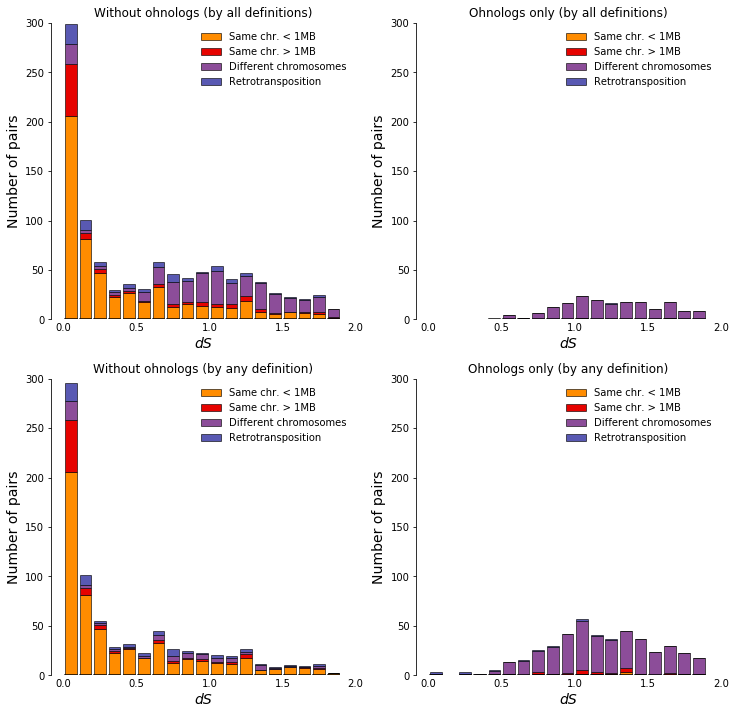

In [864]:
cursor.execute('SELECT distance, dS FROM ohnologs_any')
res = cursor.fetchall()
ds_dict = {}
for distance in set([x[0] for x in res if x[0] != 'unclassified']):
    for y in res:
        if y[0] == distance:
            try:
                ds_dict[distance].append(y[1])
            except KeyError:
                ds_dict[distance] = [y[1]]
for distance in ['> 1MB','retro','diff chr', '< 1MB']:
    if distance not in ds_dict.keys():
        ds_dict[distance] = []

ax4.set_title('Ohnologs only (by any definition)')
ax4.spines['top'].set_visible(False)
ax4.spines['bottom'].set_visible(False)
ax4.spines['right'].set_visible(False)
bins = np.arange(0, 2, 0.1)
data = [ds_dict['< 1MB'], ds_dict['> 1MB'], ds_dict['diff chr'], ds_dict['retro']]
labels = ['Same chr. < 1MB', 'Same chr. > 1MB', 'Different chromosomes', 'Retrotransposition']
colours = [(1,0.55,0,1),(0.9,0.01,0,1),(0.55,0.3,0.6,1),(0.35,0.35,0.7,1)]
h = ax4.hist(data, label = labels, histtype='barstacked', bins=bins, color=colours, rwidth=0.8, align='mid')

for x in h[2]:
    for y in x.patches:
        y.set_ec((0,0,0,0.6))
        if y.get_y() == 0 and y.get_height() != 0:
            b = y.get_bbox()
            ax4.plot([b.x0+0.0015,b.x1],[0,0], color = 'k')
ax4.set_xticks(np.arange(0,2.001,0.1))
ax4.set_yticks(np.arange(0,301,50))
ticks = [tick for tick in ax4.get_xticks() if tick == 0 or tick == 0.5 or tick == 1.0 or tick == 1.5 or tick == 2.0]
ax4.set_xticks(ticks)
ax4.xaxis.set_tick_params(length=0)
ax4.set_xlabel('dS', style='italic', size=14)
ax4.set_ylabel('Number of pairs', size = 14)

ax4.legend(edgecolor=(1,1,1,1))

plt.savefig('proximity_fig.png', bbox_inches='tight')
plt.show()

In [644]:
cursor.execute('''SELECT id1, id2 FROM supp_table''')
id_list = []
for x in cursor.fetchall():
    id_list.append(x[0])
    id_list.append(x[1])
id_list = set(id_list)
with open('gene_ids.txt', 'w') as file:
    for g in id_list:
        file.write(g + '\n')

In [342]:
cursor.execute('''CREATE TABLE IF NOT EXISTS gtex_v7_sample_att(id TEXT, tissue TEXT)''')
with open('Downloads/GTex_sample_data.txt','r') as s_file:
    header = s_file.readline()
    count = 0
    for line in s_file:
        if count > 5:
            break
        line = line.strip().split('\t')
        ID, tissue = line[0], line[6]
        cursor.execute('''INSERT INTO gtex_v7_sample_att(id, tissue) VALUES (?,?)''', (ID, tissue))
db.commit()

In [343]:
cursor.execute('''ALTER TABLE gtex_v7_sample_att ADD COLUMN included TEXT''')
with open('lan_and_pritchard_inc_samples.csv', 'r') as file:
    file.readline()
    for line in file:
        line = line.strip().split(',')
        cursor.execute('''UPDATE gtex_v7_sample_att SET included == "Yes" WHERE id == ?''', (line[1],))
db.commit()

In [347]:
# t ids have version numbers (shouldn't anymore)
# only insert samples that were included
cursor.execute('''CREATE TABLE IF NOT EXISTS gtex_v7_TPM(g_id TEXT, t_id TEXT, s_id, tissue TEXT, exp_level REAL)''') #check what effect not specifing REAL has
with open('Downloads/GTEx_Analysis_2016-01-15_v7_RSEMv1.2.22_transcript_tpm.txt','r') as exp_file:
    header = exp_file.readline().strip().split('\t')
    id_list = [x for x in header[4:]]
    sample_ID_dict, id_ind_dict = {}, {}
    id_count = 0
    for ID in id_list:
        cursor.execute('SELECT included, tissue FROM gtex_v7_sample_att WHERE id == ?', (ID,))
        res = cursor.fetchall()
        if res[0][0] == 'Yes':
            sample_ID_dict[ID] = res[0][1]
            id_ind_dict[id_count] = ID
        id_count += 1
    break_count = 0
    for line in exp_file:
        line = line.strip().split('\t')
        t_id, g_id = line[0], line[1]
        exp_values = []
        [exp_values.append(line[4:][i]) for i in id_ind_dict] #I think this should make a list of values that have included ids
        matched = zip([id_ind_dict[i] for i in id_ind_dict], exp_values)
        t_id = re.search('(.*)\.', t_id).group(1)
        for i, e in matched:
            cursor.execute('''INSERT INTO gtex_v7_TPM(g_id, t_id, s_id, tissue, exp_level) VALUES (?,?,?,?,?)''',(g_id,t_id, i, sample_ID_dict[i], e))
db.commit()            

In [348]:
cursor.execute('''CREATE INDEX trans_ids_v7 ON gtex_v7_TPM(t_id)''')

In [349]:
import numpy as np, time, re
timer, counter = time.time(), 0
# cursor.execute('''DROP TABLE exp_levels''')
cursor.execute('''CREATE TABLE IF NOT EXISTS exp_levels_v7(t_id TEXT, tissue TEXT, exp REAL)''')
cursor.execute('''SELECT transcript_id1, transcript_id2 FROM supp_table''')
res = cursor.fetchall()
not_in_gtex_list = []
for t1, t2 in res:
    cursor.execute('''SELECT tissue, exp_level, t_id FROM gtex_v7_TPM WHERE (t_id = ?) OR (t_id = ?)''', (t1,t2)) #%means any number of chars
    vals = cursor.fetchall()
    vals1 = [x for x in vals if x[2] == t1]
    vals2 = [x for x in vals if x[2] == t2]
    exp_dict = {}
    if len(vals1) != 0:
            
        for v in vals1:
            if v[0] in exp_dict.keys():
                exp_dict[v[0]].append(v[1])
            else:
                exp_dict[v[0]] = [v[1]]
        for k in exp_dict:
            l = [float(x) for x in exp_dict[k]]
            median_exp = np.median(l)
            cursor.execute('''INSERT INTO exp_levels_v7(t_id, tissue, exp) VALUES (?,?,?)''', (t1, k, median_exp))
    else:
        not_in_gtex_list.append(t1)
    exp_dict = {} 
    if len(vals2) != 0:
        for v in vals2:
            if len(vals2) == 0:
                not_in_gtex_list.append(t2)
            if v[0] in exp_dict.keys():
                exp_dict[v[0]].append(v[1])
            else:
                exp_dict[v[0]] = [v[1]]
        for k in exp_dict:
            l = [float(x) for x in exp_dict[k]]
            median_exp = np.median(l)
            cursor.execute('''INSERT INTO exp_levels_v7(t_id, tissue, exp) VALUES (?,?,?)''', (t2, k, median_exp))
    else:
        not_in_gtex_list.append(t2)
    counter += 1
    if counter % 5 == 0:
        print(counter, 'done:', round(time.time()-timer, 2), 'seconds since started')
db.commit()

5 done: 4.23 seconds since started
10 done: 4.66 seconds since started
15 done: 5.28 seconds since started
20 done: 5.75 seconds since started
25 done: 6.01 seconds since started
30 done: 6.41 seconds since started
35 done: 6.87 seconds since started
40 done: 7.37 seconds since started
45 done: 7.78 seconds since started
50 done: 8.16 seconds since started
55 done: 8.52 seconds since started
60 done: 9.06 seconds since started
65 done: 9.52 seconds since started
70 done: 9.97 seconds since started
75 done: 10.37 seconds since started
80 done: 10.75 seconds since started
85 done: 11.12 seconds since started
90 done: 11.58 seconds since started
95 done: 12.01 seconds since started
100 done: 12.37 seconds since started
105 done: 12.82 seconds since started
110 done: 13.25 seconds since started
115 done: 13.62 seconds since started
120 done: 14.0 seconds since started
125 done: 14.34 seconds since started
130 done: 14.7 seconds since started
135 done: 15.1 seconds since started
140 done: 1

1090 done: 80.66 seconds since started
1095 done: 80.88 seconds since started
1100 done: 81.18 seconds since started
1105 done: 81.36 seconds since started
1110 done: 81.53 seconds since started
1115 done: 81.66 seconds since started
1120 done: 81.85 seconds since started
1125 done: 82.05 seconds since started
1130 done: 82.25 seconds since started
1135 done: 82.4 seconds since started
1140 done: 82.67 seconds since started
1145 done: 82.85 seconds since started
1150 done: 83.03 seconds since started
1155 done: 83.21 seconds since started
1160 done: 83.4 seconds since started
1165 done: 83.61 seconds since started
1170 done: 83.73 seconds since started
1175 done: 83.94 seconds since started
1180 done: 84.12 seconds since started
1185 done: 84.32 seconds since started
1190 done: 84.51 seconds since started
1195 done: 84.71 seconds since started
1200 done: 84.91 seconds since started
1205 done: 85.04 seconds since started
1210 done: 85.25 seconds since started
1215 done: 85.51 seconds si

In [350]:
cursor.execute('''SELECT DISTINCT tissue FROM exp_levels_v7''')
tissues = [x[0] for x in cursor.fetchall()]
for id_ in not_in_gtex_list:
    for tiss in tissues:
        cursor.execute('''INSERT INTO exp_levels_v7(t_id, tissue, exp) VALUES(?,?,?)''', (id_, tiss, 'not in GTEX'))
db.commit()

In [351]:
# for each pair, get sample exp values for each tissue (paired on sample id?) and do t-test, p-val can go in supp_table
# get ratio of median expression for each pair
# exp_ratios will only contain pairs where both have data in GTEX
# cursor.execute('''DROP TABLE exp_ratios''')
cursor.execute('''CREATE TABLE IF NOT EXISTS exp_ratios_v7(id1 TEXT, id2 TEXT, tissue TEXT, ratio REAL, higher INTEGER, pval REAL)''')
cursor.execute('''SELECT transcript_id1, transcript_id2 FROM supp_table''')
for t1, t2 in cursor.fetchall():
    if t1 in not_in_gtex_list or t2 in not_in_gtex_list:
        continue
    cursor.execute('''SELECT tissue, exp FROM exp_levels_v7 WHERE t_id == ?''', (t1,))
    res1 = cursor.fetchall()
    cursor.execute('''SELECT tissue, exp FROM exp_levels_v7 WHERE t_id == ?''', (t2,))
    res2 = cursor.fetchall()
    res1 = dict(res1)
    res2 = dict(res2)
    for key in res1:
        higher = ''
        ex1 = res1[key] + 0.000001
        ex2 = res2[key] + 0.000001
        if ex1 == 0.000001 and ex2 == 0.000001:
            higher = 'Neither expressed'
            ratio = 1
        ratio = max([ex1, ex2])/min([ex1, ex2])
        if higher == 'Neither expressed':
            cursor.execute('''INSERT INTO exp_ratios_v7(id1, id2, tissue, ratio, higher) VALUES (?,?,?,?,?)''', (t1, t2, key, ratio, higher))
        elif ex1 == max([ex1, ex2]):
            cursor.execute('''INSERT INTO exp_ratios_v7(id1, id2, tissue, ratio, higher) VALUES (?,?,?,?,?)''', (t1, t2, key, ratio, 1))
        elif ex2 == max([ex1, ex2]):
            cursor.execute('''INSERT INTO exp_ratios_v7(id1, id2, tissue, ratio, higher) VALUES (?,?,?,?,?)''', (t1, t2, key, ratio, 2))
db.commit()
        

In [352]:
import time
from scipy.stats import ttest_rel
cursor.execute('''SELECT DISTINCT id1, id2 FROM exp_ratios_v7''')
res = cursor.fetchall()
timer, counter = time.time(), 0
for t1, t2 in res:
    cursor.execute('''SELECT exp_level, tissue, s_id, t_id FROM gtex_v7_TPM WHERE t_id == ? OR t_id == ?''', (t1,t2))
    out = cursor.fetchall()
    res1 = [x[:3] for x in out if x[3] == t1]
    res2 = [x[:3] for x in out if x[3] == t2]
    for tissue in [x[1] for x in res1]:
        t_list1, t_list2 = [],[]
        s_exp1 = dict([(x[2], x[0]) for x in res1 if x[1] == tissue])
        s_exp2 = dict([(x[2], x[0]) for x in res2 if x[1] == tissue])
        for key in s_exp1:
            t_list1.append(s_exp1[key])
            t_list2.append(s_exp2[key])
        t_list1 = [float(x) for x in t_list1]
        t_list2 = [float(x) for x in t_list2]
        p_val = ttest_rel(t_list1, t_list2).pvalue
        cursor.execute('''UPDATE exp_ratios_v7 SET pval = ? WHERE id1 == ? AND id2 == ? AND tissue == ?''', (p_val, t1, t2, tissue))
    counter += 1
    if counter % 5 == 0:
        print(counter, round(time.time()-timer, 2))
db.commit()        

/Users/zoevance/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3126: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:3833: RuntimeWarning: invalid value encountered in absolute
  prob = distributions.t.sf(np.abs(t), df) * 2  # use np.abs to get upper tail


5 53.42
10 107.12
15 160.67
20 214.42
25 268.1
30 321.7
35 375.25
40 428.9
45 482.15
50 535.04
55 587.79
60 640.41
65 694.05
70 747.07
75 800.58
80 853.2
85 905.81
90 958.84
95 1011.59
100 1064.37
105 1117.1
110 1170.14
115 1222.68
120 1274.75
125 1326.43
130 1378.39
135 1431.24
140 1483.85
145 1536.19
150 1589.53
155 1642.33
160 1694.88
165 1747.45
170 1799.92
175 1852.33
180 1905.48
185 1957.71
190 2009.7
195 2061.57
200 2113.32
205 2165.76
210 2217.82
215 2269.69
220 2320.97
225 2372.14
230 2424.01
235 2474.78
240 2525.99
245 2577.12
250 2628.24
255 2678.94
260 2729.61
265 2780.1
270 2830.82
275 2882.71
280 2933.6
285 2984.59
290 3035.28
295 3085.77
300 3136.69
305 3188.13
310 3238.73
315 3289.03
320 3339.51
325 3390.36
330 3440.76
335 3491.32
340 3541.9
345 3592.09
350 3644.07
355 3694.35
360 3744.49
365 3794.5
370 3844.71
375 3894.43
380 3944.11
385 3994.55
390 4045.04
395 4095.17
400 4145.31
405 4195.11
410 4245.21
415 4295.09
420 4345.11
425 4394.81
430 4444.39
435 4494.07
440 4

In [353]:
# categorize major/minor (sig higher in more tissues than the other OR higher mean exp in across tissues)
# log2(minor/major exp ratio) for each tissue
# cursor.execute('''ALTER TABLE supp_table ADD COLUMN majorMinor_t1 TEXT''')
# cursor.execute('''ALTER TABLE supp_table ADD COLUMN majorMinor_t2 TEXT''')
import numpy as np
cursor.execute('''SELECT DISTINCT transcript_id1, transcript_id2 FROM supp_table WHERE (transcript_id1 NOT IN (SELECT t_id FROM exp_levels_v7 WHERE exp == "not in GTEX")) AND (transcript_id2 NOT IN (SELECT t_id FROM exp_levels_v7 WHERE exp == "not in GTEX"))''')
res = cursor.fetchall()
# counts for number of tissues where transcript is higher
count_t1, count_t2 = 0,0
for t1, t2 in res:
    count_t1, count_t2 = 0,0
    if t1 in not_in_gtex_list or t2 in not_in_gtex_list:
        continue
    # ratio and which was higher, pval from exp_ratios table (error handling for not exp)
    cursor.execute('SELECT ratio, higher, pval, tissue FROM exp_ratios_v7 WHERE id1 == ? AND id2 == ?', (t1,t2))
    res2 = cursor.fetchall()
    for x in res2:
        rat, highest, pval = list(x[:3])
        #ratio is higher/smaller
        if pval == None: #when neither transcript is expressed, so no sig difference
            continue
        if rat >= 2 and pval < 0.001 and highest == 1:
            count_t1 += 1
        elif rat >= 2 and pval < 0.001 and highest == 2:
            count_t2 += 1
        else:
            continue
    if count_t1 > count_t2: # transcript 1 is major
        cursor.execute('''UPDATE supp_table SET majorMinor_t1 = "Major", majorMinor_t2 = "Minor" WHERE transcript_id1 == ? AND transcript_id2 == ?''', (t1,t2))
    elif count_t2 > count_t1:
        cursor.execute('''UPDATE supp_table SET majorMinor_t2 = "Major", majorMinor_t1 = "Minor" WHERE transcript_id1 == ? AND transcript_id2 == ?''', (t1,t2))
    else: #need to check the mean expression
        cursor.execute('''SELECT exp, t_id FROM exp_levels_v7 WHERE t_id == ? OR t_id == ?''', (t1, t2))
        res3 = cursor.fetchall()
        t1_exp = [x[0] for x in res3 if x[1] == t1]
        t2_exp = [x[0] for x in res3 if x[1] == t2]
        if np.mean(t1_exp) > np.mean(t2_exp):
            cursor.execute('''UPDATE supp_table SET majorMinor_t1 = "Major", majorMinor_t2 = "Minor" WHERE transcript_id1 == ? AND transcript_id2 == ?''', (t1,t2))
        elif np.mean(t2_exp) > np.mean(t1_exp):
            cursor.execute('''UPDATE supp_table SET majorMinor_t2 = "Major", majorMinor_t1 = "Minor" WHERE transcript_id1 == ? AND transcript_id2 == ?''', (t1,t2))
db.commit()


In [354]:
cursor.execute('''ALTER TABLE exp_ratios_v7 ADD COLUMN mimaRatio REAL''')
cursor.execute('''SELECT DISTINCT transcript_id1, transcript_id2 FROM supp_table WHERE (transcript_id1 NOT IN (SELECT t_id FROM exp_levels_v7 WHERE exp == "not in GTEX")) AND (transcript_id2 NOT IN (SELECT t_id FROM exp_levels_v7 WHERE exp == "not in GTEX"))''')
res = cursor.fetchall()
for t1, t2 in res:
    cursor.execute('''SELECT majorMinor_t1, majorMinor_t2 FROM supp_table WHERE transcript_id1 == ? AND transcript_id2 == ?''', (t1, t2))
    status_t1, status_t2 = cursor.fetchall()[0]
    cursor.execute('''SELECT exp, tissue, t_id FROM exp_levels_v7 where t_id == ? OR t_id == ?''', (t1,t2))
    res2 = cursor.fetchall()
    exp_t1 = [x[:2] for x in res2 if x[2] == t1]
    exp_t2 = [x[:2] for x in res2 if x[2] == t2]
    for tissue in [x[1] for x in exp_t1]:
        t1_exp_tissue, t2_exp_tissue = [x[0] for x in exp_t1 if x[1] == tissue][0]+0.000001, [x[0] for x in exp_t2 if x[1] == tissue][0] + 0.000001
        if status_t1 == 'Major':
            mm_ratio = t2_exp_tissue/t1_exp_tissue
        elif status_t1 == 'Minor':
            mm_ratio = t1_exp_tissue/t2_exp_tissue
        cursor.execute('''UPDATE exp_ratios_v7 SET mimaRatio = ? WHERE id1 == ? AND id2 == ? AND tissue == ?''', (mm_ratio, t1, t2, tissue))
db.commit()

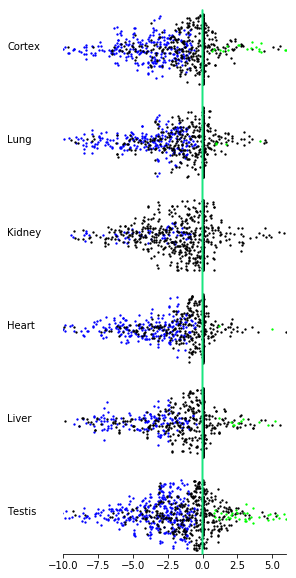

In [423]:
# categorize major/minor (sig higher in more tissues than the other OR higher mean exp in across tissues)
# log2(minor/major exp ratio) for each tissue
import matplotlib.pyplot as plt
from math import log2 as log2
fig, axes = plt.subplots(6, 1, figsize = (4,10))
ax1, ax2, ax3, ax4, ax5, ax6 = axes
#lists of values for each category (ohnologs, without etc)
val_dict = {}
for tissue in ['Brain - Cortex', 'Lung', 'Kidney - Cortex', 'Heart - Left Ventricle', 'Liver', 'Testis']:
    cursor.execute('''SELECT mimaRatio, pval, id1 FROM exp_ratios_v7 WHERE id1 IN (SELECT transcript_id1 FROM supp_table WHERE id1 IN (SELECT id1 FROM without_ohnologs_strict)) AND tissue == ?''', (tissue,))
    val_dict[tissue] = cursor.fetchall()
for k in val_dict:
    val_dict[k] = [x for x in val_dict[k] if x[1] is not None]
#brain
def exp_ratio_plot(tissue, axis, label):
    axis.text(-14, 0,label)
    axis.set_ylim(ymin=-10, ymax=10)
    axis.set_xlim(xmax=6, xmin=-10)
    sig_low_list = [log2(x[0]) for x in val_dict[tissue] if log2(x[0]) < 0 and x[1] < 0.001]
    not_sig_list = [log2(x[0]) for x in val_dict[tissue] if x[1] > 0.001]
    sig_high_list = [log2(x[0]) for x in val_dict[tissue] if log2(x[0]) > 0 and x[1] < 0.001]
    axis.plot(sig_low_list,jitter_list(sig_low_list), 'bo', ms = 1.3, zorder = 1) #sig low ratios
    axis.plot(not_sig_list, jitter_list(not_sig_list), 'ko', ms = 1.3, zorder = 1) #not sig values
    axis.plot(sig_high_list, jitter_list(sig_high_list), 'o', ms = 1.3, c = (0,1,0,1), zorder =1)#sig high values
    
    if axis != ax6:
        axis.spines['top'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.spines['left'].set_visible(False)
        
        ticks = [' ' for tick in axis.get_xticks()]
        axis.xaxis.set_visible(False)
        axis.yaxis.set_visible(False)
    else:
        axis.spines['top'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.spines['left'].set_visible(False)
        
        axis.yaxis.set_visible(False)
        
exp_ratio_plot('Brain - Cortex', ax1, 'Cortex')
exp_ratio_plot('Lung', ax2, 'Lung')
exp_ratio_plot('Kidney - Cortex', ax3, 'Kidney')
exp_ratio_plot('Heart - Left Ventricle', ax4, 'Heart')
exp_ratio_plot('Liver',ax5, 'Liver')
exp_ratio_plot('Testis', ax6, 'Testis')

from matplotlib.patches import ConnectionPatch as conn
c = conn((0,-10),(0,10),axesA=ax6, axesB=ax1, coordsA='data', coordsB= 'data', zorder=5000000000, ec = (0.1,0.9,0.5,1), lw=2)
ax6.add_patch(c)
plt.show()


In [380]:
type(conn)

type

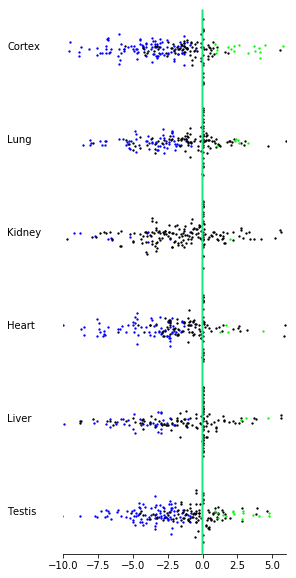

In [424]:
# categorize major/minor (sig higher in more tissues than the other OR higher mean exp in across tissues)
# log2(minor/major exp ratio) for each tissue
import matplotlib.pyplot as plt
from math import log2 as log2
fig, axes = plt.subplots(6, 1, figsize = (4,10))
ax1, ax2, ax3, ax4, ax5, ax6 = axes
#lists of values for each category (ohnologs, without etc)
val_dict = {}
for tissue in ['Brain - Cortex', 'Lung', 'Kidney - Cortex', 'Heart - Left Ventricle', 'Liver', 'Testis']:
    cursor.execute('''SELECT mimaRatio, pval, id1 FROM exp_ratios_v7 WHERE id1 IN (SELECT transcript_id1 FROM supp_table WHERE id1 IN (SELECT id1 FROM ohnologs_strict)) AND tissue == ?''', (tissue,))
    val_dict[tissue] = cursor.fetchall()
for k in val_dict:
    val_dict[k] = [x for x in val_dict[k] if x[1] is not None]


exp_ratio_plot('Brain - Cortex', ax1, 'Cortex')
exp_ratio_plot('Lung', ax2, 'Lung')
exp_ratio_plot('Kidney - Cortex', ax3, 'Kidney')
exp_ratio_plot('Heart - Left Ventricle', ax4, 'Heart')
exp_ratio_plot('Liver',ax5, 'Liver')
exp_ratio_plot('Testis', ax6, 'Testis')

from matplotlib.patches import ConnectionPatch as conn
c = conn((0,-10),(0,10),axesA=ax6, axesB=ax1, coordsA='data', coordsB= 'data', zorder=5000000000, ec = (0.1,0.9,0.5,1), lw=2)
ax6.add_patch(c)
plt.show()

plt.show()

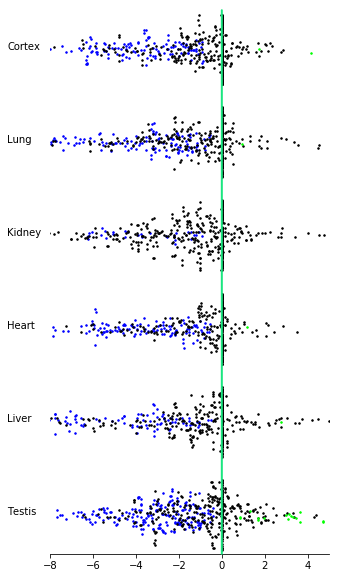

In [414]:
# categorize major/minor (sig higher in more tissues than the other OR higher mean exp in across tissues)
# log2(minor/major exp ratio) for each tissue
import matplotlib.pyplot as plt
from math import log2 as log2
fig, axes = plt.subplots(6, 1, figsize = (5,10))
ax1, ax2, ax3, ax4, ax5, ax6 = axes
#lists of values for each category (ohnologs, without etc)
val_dict = {}
for tissue in ['Brain - Cortex', 'Lung', 'Kidney - Cortex', 'Heart - Left Ventricle', 'Liver', 'Testis']:
    cursor.execute('''SELECT mimaRatio, pval, id1 FROM exp_ratios_v7 WHERE id1 IN (SELECT transcript_id1 FROM supp_table WHERE id1 IN (SELECT id1 FROM without_ohnologs_any)) AND tissue == ?''', (tissue,))
    val_dict[tissue] = cursor.fetchall()
for k in val_dict:
    val_dict[k] = [x for x in val_dict[k] if x[1] is not None]


exp_ratio_plot('Brain - Cortex', ax1, 'Cortex')
exp_ratio_plot('Lung', ax2, 'Lung')
exp_ratio_plot('Kidney - Cortex', ax3, 'Kidney')
exp_ratio_plot('Heart - Left Ventricle', ax4, 'Heart')
exp_ratio_plot('Liver',ax5, 'Liver')
exp_ratio_plot('Testis', ax6, 'Testis')

from matplotlib.patches import ConnectionPatch as conn
c = conn((0,-10),(0,10),axesA=ax6, axesB=ax1, coordsA='data', coordsB= 'data', zorder=5000000000, ec = (0.1,0.9,0.5,1), lw=2)
ax6.add_patch(c)
plt.show()

plt.show()

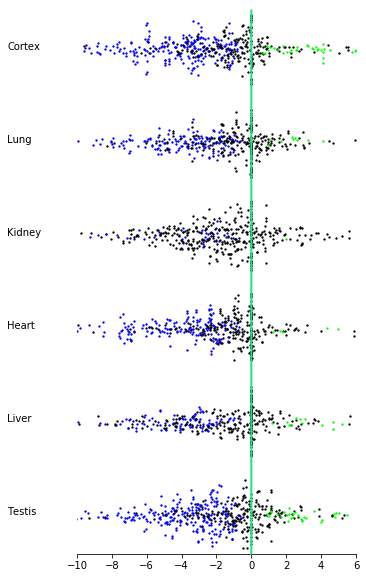

In [425]:
# categorize major/minor (sig higher in more tissues than the other OR higher mean exp in across tissues)
# log2(minor/major exp ratio) for each tissue
import matplotlib.pyplot as plt
from math import log2 as log2
fig, axes = plt.subplots(6, 1, figsize = (5,10))
ax1, ax2, ax3, ax4, ax5, ax6 = axes
#lists of values for each category (ohnologs, without etc)
val_dict = {}
for tissue in ['Brain - Cortex', 'Lung', 'Kidney - Cortex', 'Heart - Left Ventricle', 'Liver', 'Testis']:
    cursor.execute('''SELECT mimaRatio, pval, id1 FROM exp_ratios_v7 WHERE id1 IN (SELECT transcript_id1 FROM supp_table WHERE id1 IN (SELECT id1 FROM ohnologs_any)) AND tissue == ?''', (tissue,))
    val_dict[tissue] = cursor.fetchall()
for k in val_dict:
    val_dict[k] = [x for x in val_dict[k] if x[1] is not None]

exp_ratio_plot('Brain - Cortex', ax1, 'Cortex')
exp_ratio_plot('Lung', ax2, 'Lung')
exp_ratio_plot('Kidney - Cortex', ax3, 'Kidney')
exp_ratio_plot('Heart - Left Ventricle', ax4, 'Heart')
exp_ratio_plot('Liver',ax5, 'Liver')
exp_ratio_plot('Testis', ax6, 'Testis')

from matplotlib.patches import ConnectionPatch as conn
c = conn((0,-10),(0,10),axesA=ax6, axesB=ax1, coordsA='data', coordsB= 'data', zorder=5000000000, ec = (0.1,0.9,0.5,1), lw=2)
ax6.add_patch(c)
plt.show()

plt.show()

In [491]:
def dec_range(start, stop, step):
    r = start
    while r < stop:
        yield r
        r += step
def jitter_list(l, center=0, step = 0.1):
    import random
    if center != 0:
        test_list = [round(x, 1) for x in l]
        out_list = []
        for x in l:
            if round(x,1) == 1:
                c = 0.2
            else:
                c = test_list.count(round(x,1))
                c = c*0.01
            out_list.append(random.sample(list(dec_range(center-c, center + c, step)), 1)[0])
        
        return out_list
    else:
        test_list = [round(x, 1) for x in l]
        out_list = []
        for x in l:
            if test_list.count(round(x,1)) < 9:
                c = test_list.count(round(x,1))
            else:
                c = 9
            out_list.append(random.sample(list(dec_range(-c, c, step)), 1)[0])
        return out_list


In [457]:
import scipy.stats as stats
# cursor.execute('''ALTER TABLE supp_table ADD COLUMN corr REAL''')
cursor.execute('''SELECT DISTINCT transcript_id1, transcript_id2 FROM supp_table''')
ids = [x for x in cursor.fetchall()]

for t1, t2 in ids:
    if t1 in not_in_gtex_list or t2 in not_in_gtex_list:
        continue
    cor_list1, cor_list2 = [],[]
    cursor.execute('''SELECT exp, tissue, t_id FROM exp_levels_v7 WHERE t_id == ? OR t_id == ?''', (t1, t2))
    res = cursor.fetchall()
    exp_list1 = [x[:2] for x in res if x[2] == t1]
    exp_list2 = [x[:2] for x in res if x[2] == t2]
    for tissue in [x[1] for x in exp_list1]:
        cor_list1.extend([x[0] for x in exp_list1 if x[1] == tissue])
        cor_list2.extend([x[0] for x in exp_list2 if x[1] == tissue])
        if len(cor_list1) != len(cor_list2):
            raise ValueError('something went wrong, lists different lengths')
    try:
        corr = stats.pearsonr(cor_list1, cor_list2)
        
    except:
        print(cor_list1, cor_list2)
    
    r = float(corr[0])
    if np.isnan(r):
        continue
    print(r)
    cursor.execute('''UPDATE supp_table SET corr == ? WHERE transcript_id1 == ? AND transcript_id2 == ?''', (r,t1,t2))
# cursor.execute('''ALTER TABLE ohnologs_strict ADD COLUMN corr REAL''')
# cursor.execute('''ALTER TABLE without_ohnologs_strict ADD COLUMN corr REAL''')
# cursor.execute('''ALTER TABLE ohnologs_any ADD COLUMN corr REAL''')
# cursor.execute('''ALTER TABLE without_ohnologs_any ADD COLUMN corr REAL''')

for table in ['ohnologs_strict', 'without_ohnologs_strict', 'ohnologs_any', 'without_ohnologs_any']:
    query = 'UPDATE ' + table + ' SET corr = (SELECT supp_table.corr FROM supp_table WHERE (supp_table.transcript_id1 == ' + table + '.transcript_id1) AND (supp_table.transcript_id2 == ' + table + '.transcript_id2))'
    cursor.execute(query)
db.commit()

-0.0485139637588089
0.20200327947112118
0.01562096636771215


/Users/zoevance/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


-0.05755157603745528
-0.025893616428399293
0.4293201013673932
0.21457240524472368
0.19682033476969849
0.11209052104722221
0.15592882280681375
0.2664173141811922
0.4350977584589318
-0.050029437910345725
-0.20108185945880577
-0.03928416809044149
0.9999758242233624
0.08103933321640652
0.2400026722495517
0.1382677990232556
0.8467092240008472
0.7933887803774122
0.10121192356632062
0.14551847913341248
0.20539093031468608
-0.11058210071447204
0.1509593647812342
-0.08142712061770158
0.4003087786217667
0.05738728548177104
0.21324051252750134
0.6581186898348149
-0.07467119372515228
0.2695817872670983
-0.1823015547548475
0.2913667877280917
0.9122376055361942
0.29679978110934213
-0.09101909418514018
-0.020901833569305393
0.7715480341698362
-0.050893370859054946
0.2982974820108552
0.3823679191271924
0.21499562802479394
0.19119731558782183
-0.14197082438706288
0.5332115266882357
-0.15497728214056777
0.2020472447813282
-0.0396504303804403
-0.04964210874836297
0.6474829511641631
-0.08571297305261871
0

0.5782115197403666
0.6890350439060751
0.6739959052954347
0.3923291774852065
-0.20008279056903708
-0.12727564411342354
0.9999987656279059
-0.3096064211798921
0.5817280584338897
-0.04241248796984391
-0.010666713363579328
0.23893550020433726
0.17164533112994498
0.614086504119544
0.20412620615609542
0.8831058706859688
0.2218523183544815
0.49236917012944076
0.328854524407051
0.7381111155139577
0.0758088272385083
0.3624154267215048
0.5238755558857081
0.35722343849636407
-0.0548084679548211
-0.19388409877695081
0.1025212768807717
0.10415570132035867
0.20291286062684022
-0.0725918597542074
-0.07052991285016226
0.19883927062889706
0.14239391211139932
-0.01538977561529021
0.01663509503231382
0.7276710348691003
-0.03194379684818819
0.927091357209055
0.7361339681735037
0.6780645669853849
0.727207635427424
-0.1105325956131034
0.12693276918722116
0.8237252346439657
0.6682161245515067
0.9999994880771259
0.36355857724036156
0.8552647706728104
0.2938699665527016
0.760603092918386
0.0805547080930529
0.3

0.01709930528252071
0.6641605766352146
-0.030931823959886535
0.6692911604836927
0.8163852512042497
-0.045072574857029216
0.9873535549888701
0.999995967597441
-0.05038717548424961
-0.12067190438930984
0.4366229097667261
-0.2038129365336205
0.05831033210618536
0.05017865916440454
0.9986671388482891
0.5196230521703643
-0.10465592197568771
0.4711652631665629
-0.05835438399335089
-0.04839693390937517
0.585000921075798
0.2827028891966597
0.9999880966584554
0.08889623944106723
-0.05790468931922948
0.998552990213306
0.14599555737589615
-0.13704677300379334
0.3660025410231432
0.3354546252283553
0.32997970185162573
0.2845624318583146
0.959846701485327
0.805361931046474
-0.016750800961601846
0.2588322484053775
-0.06359133721087569
0.09666292455987198
0.07592581011695315
-0.02260574408287267
-0.04400370953989101
-0.1237245453788233
0.5481152955917357
0.2698003680525983
0.41897510802571325
-0.20654993222175408
0.14308439647235177
0.23020603577101442
0.9385204124618133
-0.1605459564360245
-0.2035887

-0.12616738072648095
0.9774985975334922
0.40311945804232613
0.9424770241605781
0.9928484838498947
0.9950414217717912
0.9976631200196546
0.9799199018765834
0.9999999999999997
0.9884964114830075
0.20815895726529368
0.050481972793822355
0.5662548737317177
0.9202384955405505
0.03066293343661707
-0.07091934286103388
-0.12067409707479906
0.14116764788962635
0.6678249084524206
0.20777104189386308


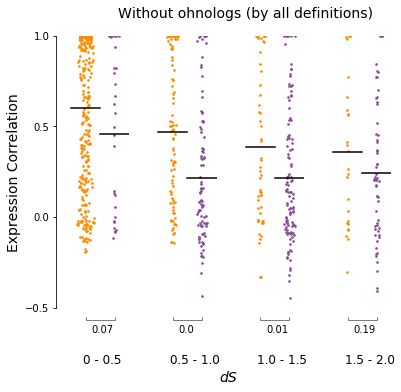

In [591]:
cursor.execute('''SELECT corr, distance, ds FROM without_ohnologs_strict WHERE NOT corr IS NULL''')
res = cursor.fetchall()

list1 = [x[0] for x in res if (x[1] == '< 1MB' and 0<= x[2] < 0.5)]
list2 = [x[0] for x in res if (x[1] == 'diff chr' and 0<= x[2] < 0.5)]

list3 = [x[0] for x in res if (x[1] == '< 1MB' and 0.5<= x[2] < 1)]
list4 = [x[0] for x in res if (x[1] == 'diff chr' and 0.5<= x[2] < 1)]

list5 = [x[0] for x in res if (x[1] == '< 1MB' and 1<= x[2] < 1.5)]
list6 = [x[0] for x in res if (x[1] == 'diff chr' and 1<= x[2] < 1.5)]

list7 = [x[0] for x in res if (x[1] == '< 1MB' and 1.5<= x[2] <= 2)]
list8 = [x[0] for x in res if (x[1] == 'diff chr' and 1.5<= x[2] <= 2)]

fig, axes = plt.subplots(1, 4, figsize = (6,5))
ax1, ax2, ax3, ax4 = axes

def scatter_plot_corr(axis, list1, list2, c1, c2, interval_label):
    import numpy as np
    axis.plot(jitter_list(list1, center = c1, step = 0.01), list1, 'o', ms = 1.6, c = (1,0.55,0,1))
    axis.plot(jitter_list(list2, center = c2, step = 0.01), list2, 'o', ms = 1.6, c = (0.55,0.3,0.6,1))
    
    axis.text(0.9,-0.81,interval_label, fontsize = 12)
    axis.set_ylim(ymin=-0.501, ymax=1)
    axis.set_xlim(xmax=2.5, xmin=0)
    axis.set_yticks(np.arange(-0.5,1.01, 0.5))
    if axis == ax2:
        axis.text(2.6, -0.91,'dS', style = 'italic', fontsize=14)
        axis.text(-0.9,1.1, 'Without ohnologs (by all definitions)', fontsize =14)
    mean1 = np.mean(list1)
    mean2 = np.mean(list2)
    
    axis.plot([c1-0.5, c1 + 0.5],[mean1,mean1], c= 'k')
    axis.plot([c2-0.5, c2 + 0.5],[mean2,mean2], c = 'k')
    
    if axis != ax1:
        axis.spines['top'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.spines['left'].set_visible(False)
        
        ticks = [' ' for tick in axis.get_xticks()]
        axis.xaxis.set_visible(False)
        axis.yaxis.set_visible(False)
    else:
        axis.spines['top'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.set_ylabel('Expression Correlation', fontsize=14)
        axis.xaxis.set_visible(False)
        
    from scipy.stats import ttest_ind
    pval = round(ttest_ind(list1,list2).pvalue,2)
    axis.plot([1,1,2,2],[-0.55,-0.57,-0.57,-0.55], c = 'k', lw=0.5, clip_on=False)
    axis.text(1.2,-0.64, str(pval))


scatter_plot_corr(ax1, list1, list2, 1,2,'0 - 0.5')
scatter_plot_corr(ax2, list3, list4, 1,2, '0.5 - 1.0')
scatter_plot_corr(ax3, list5, list6, 1,2, '1.0 - 1.5')
scatter_plot_corr(ax4, list7, list8, 1,2, '1.5 - 2.0')
plt.savefig('no_strict_ohnologs.png', bbox_inches = 'tight')
plt.show()

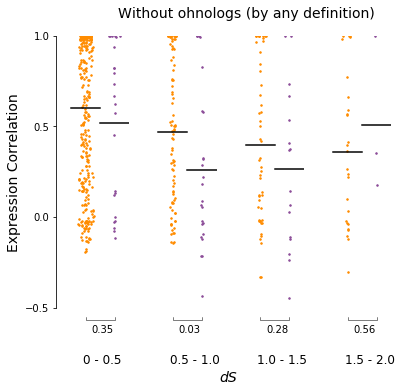

In [592]:
cursor.execute('''SELECT corr, distance, ds FROM without_ohnologs_any WHERE NOT corr IS NULL''')
res = cursor.fetchall()

list1 = [x[0] for x in res if (x[1] == '< 1MB' and 0<= x[2] < 0.5)]
list2 = [x[0] for x in res if (x[1] == 'diff chr' and 0<= x[2] < 0.5)]

list3 = [x[0] for x in res if (x[1] == '< 1MB' and 0.5<= x[2] < 1)]
list4 = [x[0] for x in res if (x[1] == 'diff chr' and 0.5<= x[2] < 1)]

list5 = [x[0] for x in res if (x[1] == '< 1MB' and 1<= x[2] < 1.5)]
list6 = [x[0] for x in res if (x[1] == 'diff chr' and 1<= x[2] < 1.5)]

list7 = [x[0] for x in res if (x[1] == '< 1MB' and 1.5<= x[2] <= 2)]
list8 = [x[0] for x in res if (x[1] == 'diff chr' and 1.5<= x[2] <= 2)]

fig, axes = plt.subplots(1, 4, figsize = (6,5))
ax1, ax2, ax3, ax4 = axes

def scatter_plot_corr(axis, list1, list2, c1, c2, interval_label):
    import numpy as np
    axis.plot(jitter_list(list1, center = c1, step = 0.01), list1, 'o', ms = 1.5, c = (1,0.55,0,1), label = 'Within 1MB')
    axis.plot(jitter_list(list2, center = c2, step = 0.01), list2, 'o', ms = 1.5, c = (0.55,0.3,0.6,1), label = 'Diff chr')
    
    axis.text(0.9,-0.81,interval_label, fontsize = 12)
    axis.set_ylim(ymin=-0.501, ymax=1)
    axis.set_xlim(xmax=2.5, xmin=0)
    axis.set_yticks(np.arange(-0.5,1.01, 0.5))
    if axis == ax2:
        axis.text(2.6, -0.91,'dS', style = 'italic', fontsize=14)
        axis.text(-0.9,1.1, 'Without ohnologs (by any definition)', fontsize =14)
    mean1 = np.mean(list1)
    mean2 = np.mean(list2)
    
    axis.plot([c1-0.5, c1 + 0.5],[mean1,mean1], c= 'k', label = 'Group mean')
    axis.plot([c2-0.5, c2 + 0.5],[mean2,mean2], c = 'k')
    
    
    
    if axis != ax1:
        axis.spines['top'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.spines['left'].set_visible(False)
        
        ticks = [' ' for tick in axis.get_xticks()]
        axis.xaxis.set_visible(False)
        axis.yaxis.set_visible(False)
    else:
        axis.spines['top'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.set_ylabel('Expression Correlation', fontsize=14)
        axis.xaxis.set_visible(False)
        
    from scipy.stats import ttest_ind
    pval = round(ttest_ind(list1,list2).pvalue,2)
    axis.plot([1,1,2,2],[-0.55,-0.57,-0.57,-0.55], c = 'k', lw=0.5, clip_on=False)
    axis.text(1.2,-0.64, str(pval))


scatter_plot_corr(ax1, list1, list2, 1,2,'0 - 0.5')
scatter_plot_corr(ax2, list3, list4, 1,2, '0.5 - 1.0')
scatter_plot_corr(ax3, list5, list6, 1,2, '1.0 - 1.5')
scatter_plot_corr(ax4, list7, list8, 1,2, '1.5 - 2.0')
plt.savefig('no_any_ohnologs.png', bbox_inches = 'tight')


plt.show()

/Users/zoevance/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


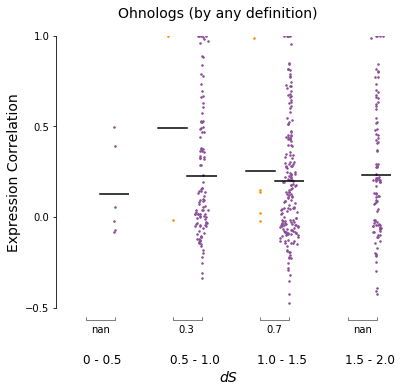

In [593]:
cursor.execute('''SELECT corr, distance, ds FROM ohnologs_any WHERE NOT corr IS NULL''')
res = cursor.fetchall()

list1 = [x[0] for x in res if (x[1] == '< 1MB' and 0<= x[2] < 0.5)]
list2 = [x[0] for x in res if (x[1] == 'diff chr' and 0<= x[2] < 0.5)]

list3 = [x[0] for x in res if (x[1] == '< 1MB' and 0.5<= x[2] < 1)]
list4 = [x[0] for x in res if (x[1] == 'diff chr' and 0.5<= x[2] < 1)]

list5 = [x[0] for x in res if (x[1] == '< 1MB' and 1<= x[2] < 1.5)]
list6 = [x[0] for x in res if (x[1] == 'diff chr' and 1<= x[2] < 1.5)]

list7 = [x[0] for x in res if (x[1] == '< 1MB' and 1.5<= x[2] <= 2)]
list8 = [x[0] for x in res if (x[1] == 'diff chr' and 1.5<= x[2] <= 2)]

fig, axes = plt.subplots(1, 4, figsize = (6,5))
ax1, ax2, ax3, ax4 = axes

def scatter_plot_corr(axis, list1, list2, c1, c2, interval_label):
    import numpy as np
    axis.plot(jitter_list(list1, center = c1, step = 0.01), list1, 'o', ms = 1.5, c = (1,0.55,0,1))
    axis.plot(jitter_list(list2, center = c2, step = 0.01), list2, 'o', ms = 1.5, c = (0.55,0.3,0.6,1))
    
    axis.text(0.9,-0.81,interval_label, fontsize = 12)
    axis.set_ylim(ymin=-0.501, ymax=1)
    axis.set_xlim(xmax=2.5, xmin=0)
    axis.set_yticks(np.arange(-0.5,1.01, 0.5))
    if axis == ax2:
        axis.text(2.6, -0.91,'dS', style = 'italic', fontsize=14)
        axis.text(-0.9,1.1, 'Ohnologs (by any definition)', fontsize =14)
    mean1 = np.mean(list1)
    mean2 = np.mean(list2)
    
    axis.plot([c1-0.5, c1 + 0.5],[mean1,mean1], c= 'k')
    axis.plot([c2-0.5, c2 + 0.5],[mean2,mean2], c = 'k')
    
    if axis != ax1:
        axis.spines['top'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.spines['left'].set_visible(False)
        
        ticks = [' ' for tick in axis.get_xticks()]
        axis.xaxis.set_visible(False)
        axis.yaxis.set_visible(False)
    else:
        axis.spines['top'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.set_ylabel('Expression Correlation', fontsize=14)
        axis.xaxis.set_visible(False)
        
    from scipy.stats import ttest_ind
    pval = round(ttest_ind(list1,list2).pvalue,2)
    axis.plot([1,1,2,2],[-0.55,-0.57,-0.57,-0.55], c = 'k', lw=0.5, clip_on=False)
    axis.text(1.2,-0.64, str(pval))


scatter_plot_corr(ax1, list1, list2, 1,2,'0 - 0.5')
scatter_plot_corr(ax2, list3, list4, 1,2, '0.5 - 1.0')
scatter_plot_corr(ax3, list5, list6, 1,2, '1.0 - 1.5')
scatter_plot_corr(ax4, list7, list8, 1,2, '1.5 - 2.0')
plt.savefig('ohnologs_any.png', bbox_inches = 'tight')


plt.show()

/Users/zoevance/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/zoevance/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


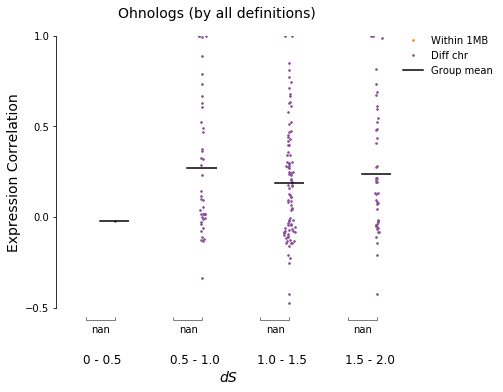

In [594]:
cursor.execute('''SELECT corr, distance, ds FROM ohnologs_strict WHERE NOT corr IS NULL''')
res = cursor.fetchall()

list1 = [x[0] for x in res if (x[1] == '< 1MB' and 0<= x[2] < 0.5)]
list2 = [x[0] for x in res if (x[1] == 'diff chr' and 0<= x[2] < 0.5)]

list3 = [x[0] for x in res if (x[1] == '< 1MB' and 0.5<= x[2] < 1)]
list4 = [x[0] for x in res if (x[1] == 'diff chr' and 0.5<= x[2] < 1)]

list5 = [x[0] for x in res if (x[1] == '< 1MB' and 1<= x[2] < 1.5)]
list6 = [x[0] for x in res if (x[1] == 'diff chr' and 1<= x[2] < 1.5)]

list7 = [x[0] for x in res if (x[1] == '< 1MB' and 1.5<= x[2] <= 2)]
list8 = [x[0] for x in res if (x[1] == 'diff chr' and 1.5<= x[2] <= 2)]

fig, axes = plt.subplots(1, 4, figsize = (6,5))
ax1, ax2, ax3, ax4 = axes

def scatter_plot_corr(axis, list1, list2, c1, c2, interval_label):
    import numpy as np
    axis.plot(jitter_list(list1, center = c1, step = 0.01), list1, 'o', ms = 1.6, c = (1,0.55,0,1), label = 'Within 1MB')
    axis.plot(jitter_list(list2, center = c2, step = 0.01), list2, 'o', ms = 1.6, c = (0.55,0.3,0.6,1), label = 'Diff chr')
    
    axis.text(0.9,-0.81,interval_label, fontsize = 12)
    axis.set_ylim(ymin=-0.501, ymax=1)
    axis.set_xlim(xmax=2.5, xmin=0)
    axis.set_yticks(np.arange(-0.5,1.01, 0.5))
    if axis == ax2:
        axis.text(2.6, -0.91,'dS', style = 'italic', fontsize=14)
        axis.text(-0.9,1.1, 'Ohnologs (by all definitions)', fontsize =14)
    mean1 = np.mean(list1)
    mean2 = np.mean(list2)
    
    axis.plot([c1-0.5, c1 + 0.5],[mean1,mean1], c= 'k', label = 'Group mean')
    axis.plot([c2-0.5, c2 + 0.5],[mean2,mean2], c = 'k')
    if axis == ax4:
        axis.legend(loc=(1.1,0.84), frameon=False)
    if axis != ax1:
        axis.spines['top'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.spines['left'].set_visible(False)
        
        ticks = [' ' for tick in axis.get_xticks()]
        axis.xaxis.set_visible(False)
        axis.yaxis.set_visible(False)
    else:
        axis.spines['top'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.set_ylabel('Expression Correlation', fontsize=14)
        axis.xaxis.set_visible(False)
        
    from scipy.stats import ttest_ind
    pval = round(ttest_ind(list1,list2).pvalue,2)
    axis.plot([1,1,2,2],[-0.55,-0.57,-0.57,-0.55], c = 'k', lw=0.5, clip_on=False)
    axis.text(1.2,-0.64, str(pval))
    

scatter_plot_corr(ax1, list1, list2, 1,2,'0 - 0.5')
scatter_plot_corr(ax2, list3, list4, 1,2, '0.5 - 1.0')
scatter_plot_corr(ax3, list5, list6, 1,2, '1.0 - 1.5')
scatter_plot_corr(ax4, list7, list8, 1,2, '1.5 - 2.0')
plt.savefig('strict_ohnologs.png', bbox_inches = 'tight')


plt.show()

In [88]:
# creates user-defined regex function, removes version number of transcript ids and indexes the table
import sqlite3
def regexp(expr, item):
    import re
    try:
        expr, item = str(expr), str(item)
        result = re.search(expr, item)
        group = result.group(1)
        if result != None:
            group = str(result.group(1))
            return group
        else:
            item = str(item)
            return item
    except Exception as e:
        print(e)
db.create_function("REGEXP_GROUP", 2, regexp)
cursor.execute('''UPDATE gtex_v3_RPKM SET t_id = REGEXP_GROUP(?, t_id)''', ('(.*)\.',))
cursor.execute('''CREATE INDEX trans_ids ON gtex_v3_RPKM(t_id)''')

In [263]:
sig_low_list

[]

In [315]:
[x for x in val_dict['Liver']]

[]

In [437]:
l = [34,654,7456]
l2 = [345,83,786]
s = stats.pearsonr(l,l2)
type(s)

tuple

In [441]:
type(1.0)

float

In [604]:
cursor.execute('''DROP TABLE brawand_exp''')
cursor.execute('''CREATE TABLE IF NOT EXISTS brawand_exp(h_id TEXT, m_id TEXT, tissue TEXT, h_exp REAL, m_exp REAL)''')
with open('Downloads/Supplementary_Data1/NormalizedRPKM_ConstitutiveExons_Primate1to1Orthologues.txt') as file:
    header = file.readline().strip().split('\t')
    human_cols, mac_cols = {},{}
    for x in header:
        if 'hsa' in x and header.index(x) != 0:
            human_cols[header.index(x)] = x
        elif 'mml' in x and header.index(x) != 4:
            mac_cols[header.index(x)] = x #dicts specifying the tissue at each index
    for line in file:
        h_exp_dict, m_exp_dict = {}, {}
        line = line.strip().split()
        h_gene_id, m_gene_id = line[0], line[4]
        for ind in human_cols:
            v = line[ind]
            if 'ts M' in human_cols[ind]:
                t = human_cols[ind][4:10]
            else:
                t = human_cols[ind][4:8]
            h_exp_dict[t] = v
        for ind in mac_cols:
            v = line[ind]
            if 'ts M' in mac_cols[ind]:
                t = mac_cols[ind][4:10]
            else:
                t = mac_cols[ind][4:8]
            m_exp_dict[t] = v
        for key in h_exp_dict:
            cursor.execute('''INSERT INTO brawand_exp(h_id, m_id, tissue, h_exp, m_exp) VALUES (?,?,?,?,?)''', (h_gene_id, m_gene_id, key, h_exp_dict[key],m_exp_dict[key]))
db.commit()

In [ ]:
cursor.execute('''ALTER TABLE supp_table ADD COLUMN major_macaque REAL''')
cursor.execute('''ALTER TABLE supp_table ADD COLUMN minor_macaque REAL''')
cursor.execute('''ALTER TABLE supp_table ADD COLUMN sum_macaque REAL''')